# Covid Analysis - Visualisation. Answer the following questions:

## Import library

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

## Loading Datasets

In [3]:
df = pd.read_csv('country_vaccination_preprocessed.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day,month_name
0,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,5,27,May
1,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,6,3,Jun
2,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2022,1,27,Jan
3,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021,2,18,Feb
4,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021,5,11,May


## Preprocessing

In [6]:
df.isnull().sum()  # Checking null values

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [8]:
df = df.fillna(0) # replace null with 

In [24]:
def name(data):
    
    name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    return name[data-1]

In [34]:
# Adding Year and Months columns 

df['year']               = df[             'date' ].apply( lambda x : x.split('-')[0] )

df['month']              = df[             'date' ].apply( lambda x : int( x.split('-')[1] ) )

df['month_name']         = df[             'month'].apply( name )

df['total_vaccinations'] = df['total_vaccinations'].apply( lambda x : int( x ))

In [243]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,month_name
0,Afghanistan,AFG,2021-02-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,Feb
1,Afghanistan,AFG,2021-02-23,0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,Feb
2,Afghanistan,AFG,2021-02-24,0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,Feb
3,Afghanistan,AFG,2021-02-25,0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,Feb
4,Afghanistan,AFG,2021-02-26,0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,Feb


## 1. Find the number of Total Vaccinations in India in Year 2020, 2021 and 2022

['2020', '2021', '2022'] [0, 174118546779, 149321759019]
o -3 1.1

o -37 6.6

o -37 6.6



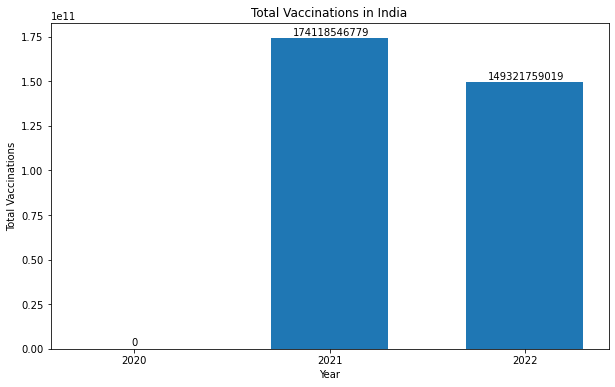

In [200]:
data  = df[df['country'] == 'India']
data  = data.groupby('year').sum()
data  = data['total_vaccinations']

x     = list(data.index)
y     = list(data.values)

x     = ['2020'] + x
y     = [0]      + y
print(x,y)

plt.figure(figsize=(10,6))
ax = plt.bar(x,y,width = 0.6)

for k,i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    test      = ( bar_width + len(txt) ) / 2 + bar_width / 2
    
    offset    = -3 if y[k]==0 else -37
    
    plt.annotate(
        text   = txt,
        xy     = (x_cord , y_cord),
        xytext = ( offset , 2.9),
        textcoords="offset points"
                )
        
plt.xlabel('Year')
plt.ylabel('Total Vaccinations')

#plt.bar_label(ax.containers[0])

plt.title('Total Vaccinations in India')


plt.show()


## 2. Compare number of total vaccinations in year 2020 of India and USA

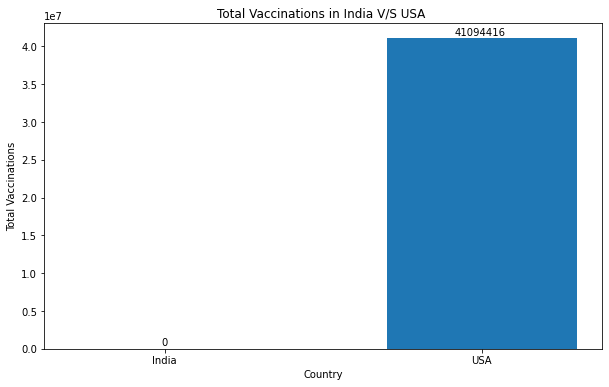

In [241]:
data = df[  df[      'year'] ==  '2020']

IND  = data[data[ 'country'] == 'India'].total_vaccinations.sum()

USA  = data[data['iso_code'] ==   'USA'].total_vaccinations.sum()

x    = [ 'India', 'USA' ]
y    = [  IND   ,  USA  ]


plt.figure(figsize=(10,6))
ax = plt.bar(x,y,width = 0.6)

for k,i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    test      = ( bar_width + len(txt) ) / 2 + bar_width / 2
    
    offset    = -3 if y[k]==0 else -27
    
    plt.annotate(
        text   = txt,
        xy     = (x_cord , y_cord),
        xytext = ( offset , 2.9),
        textcoords="offset points"
                )
        
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')


plt.title('Total Vaccinations in India V/S USA ')


plt.show()

## 3. Compare number of total vaccinations in year 2021 of India and China

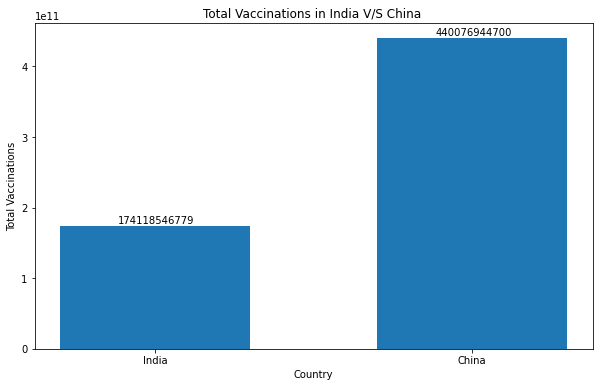

In [242]:
data = df[  df[      'year'] ==  '2021']

IND  = data[data['country'] == 'India'].total_vaccinations.sum()

CHI  = data[data['country'] == 'China'].total_vaccinations.sum()

x    = [ 'India', 'China' ]
y    = [  IND   ,  CHI  ]


plt.figure(figsize=(10,6))
ax = plt.bar(x,y,width = 0.6)

for k,i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    test      = ( bar_width + len(txt) ) / 2 + bar_width / 2
    
    offset    = -3 if y[k]==0 else -37
    
    plt.annotate(
        text   = txt,
        xy     = (x_cord , y_cord),
        xytext = ( offset , 2.9),
        textcoords="offset points"
                )
        
plt.xlabel('Country')
plt.ylabel('Total Vaccinations')


plt.title('Total Vaccinations in India V/S China ')


plt.show()

## 4. Find the number of Vaccinations in each month in India in the year 2021

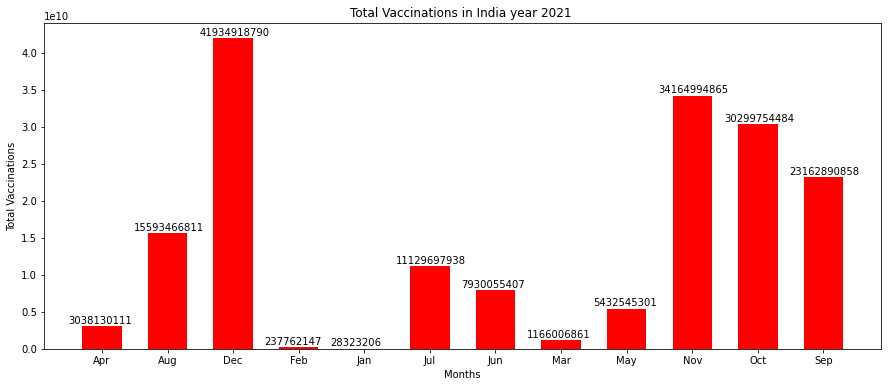

In [285]:
data = df[   df[      'year'] ==  '2021']
data = data[ data[ 'country'] == 'India']

data = data.groupby('month_name').sum().total_vaccinations

x    = data.index
y    = data.values


plt.figure(figsize=(15,6))
ax = plt.bar(x,y,width = 0.6, color = 'red')

for k,i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    test      = ( bar_width + len(txt) ) / 2 + bar_width / 2

    plt.annotate(
        text   = txt,
        xy     = (x_cord , y_cord),
        
        xytext = ( -34 , 2.9 ),
        textcoords="offset points"
        
                )
        
plt.xlabel('Months')
plt.ylabel('Total Vaccinations')


plt.title('Total Vaccinations in India year 2021 ')


plt.show()

## 5. Which month has the most number of total vaccinations in India in 2021?

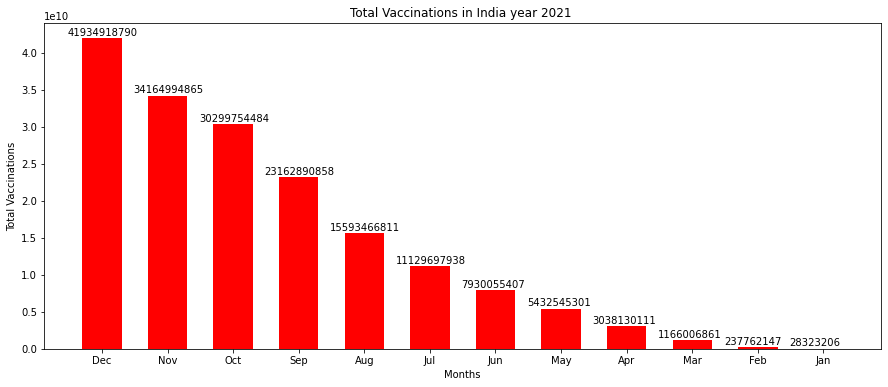

In [289]:
data = df[   df[      'year'] ==  '2021']
data = data[ data[ 'country'] == 'India']

data = data.groupby('month_name').sum().total_vaccinations
data = data.sort_values(ascending=False)

x    = data.index
y    = data.values


plt.figure(figsize=(15,6))
ax = plt.bar(x,y,width = 0.6, color = 'red')

for k,i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    test      = ( bar_width + len(txt) ) / 2 + bar_width / 2

    plt.annotate(
        text   = txt,
        xy     = (x_cord , y_cord),
        
        xytext = ( -34 , 2.9 ),
        textcoords="offset points"
        
                )
        
plt.xlabel('Months')
plt.ylabel('Total Vaccinations')


plt.title('Total Vaccinations in India year 2021 ')


plt.show()